In [1]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import calplot
import matplotlib.cm as cm

# **Weather Forecasting**

**Brief description of the dataset**\
This dataset provides data on weather from 1st January 2009 to 31st December 2016. This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity, collected every ten minutes.

**Project steps**\
The main aim of this project is to perform weather forecasting for the period January-December 2016.\
Following what we have seen during the lessons, a comprehensive pipeline should be devised, including:
1. Loading, converting and cleaning of the data (note: aggregate the data in order to have weekly frequency).
Divide your dataset into training and testing;
2. Exploring the dataset with descriptive statistics and frequency analysis. Use appropriate graphs to visualise
the data at hand;
3. Describing the time series patterns (visually and numerically);
4. Focusing on temperature (degC, dependent variable), build the most appropriate models to forecast the
data for the specified period. Evaluate the model performance using different metrics. Visualise the results with appropriate graphs.

For the different steps, comment on the main results and any relevant observation/finding you have noticed.

## **Point 1**
Loading, converting and cleaning of the data (note: aggregate the data in order to have weekly frequency).
Divide your dataset into training and testing.

### Load the data

In [2]:
weather_df = pd.read_csv('Weather_ts.csv', sep=',', parse_dates=['Date Time'],  dayfirst=True, index_col='Date Time')
weather_df

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90   93.30   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28   93.40   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31   93.90   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07   94.20   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04   94.10   
...                       ...       ...       ...          ...     ...   
2016-12-31 23:10:00   1000.11     -3.93    269.23        -8.09   72.60   
2016-12-31 23:20:00   1000.07     -4.05    269.10        -8.13   73.10   
2016-12-31 23:30:00    999.93     -3.35    269.81        -8.06   69.71   
2016-12-31 23:40:00    999.82     -3.16    270.01        -8.21   67.91   
2016-12-31 23:50:00    999.81     -4.23    268.94        -8.53   71.80   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26          3.07          0.19       1.92   
2009-01-01 00:50:00          3.27          3.08          0.19       1.92   
...                           ...           ...           ...        ...   
2016-12-31 23:10:00          4.56          3.31          1.25       2.06   
2016-12-31 23:20:00          4.52          3.30          1.22       2.06   
2016-12-31 23:30:00          4.77          3.32          1.44       2.07   
2016-12-31 23:40:00          4.84          3.28          1.55       2.05   
2016-12-31 23:50:00          4.46          3.20          1.26       1.99   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
2009-01-01 00:10:00             3.12       1307.75      1.03           1.75   
2009-01-01 00:20:00             3.03       1309.80      0.72           1.50   
2009-01-01 00:30:00             3.02       1310.24      0.19           0.63   
2009-01-01 00:40:00             3.08       1309.19      0.34           0.50   
2009-01-01 00:50:00             3.09       1309.00      0.32           0.63   
...                              ...           ...       ...            ...   
2016-12-31 23:10:00             3.31       1292.41      0.56           1.00   
2016-12-31 23:20:00             3.30       1292.98      0.67           1.52   
2016-12-31 23:30:00             3.32       1289.44      1.14           1.92   
2016-12-31 23:40:00             3.28       1288.39      1.08           2.00   
2016-12-31 23:50:00             3.20       1293.56      1.49           2.16   

                     wd (deg)  
Date Time                      
2009-01-01 00:10:00     152.3  
2009-01-01 00:20:00     136.1  
2009-01-01 00:30:00     171.6  
2009-01-01 00:40:00     198.0  
2009-01-01 00:50:00     214.3  
...                       ...  
2016-12-31 23:10:00     202.6  
2016-12-31 23:20:00     240.0  
2016-12-31 23:30:00     234.3  
2016-12-31 23:40:00     215.2  
2016-12-31 23:50:00     225.8  

[420550 rows x 14 columns]

The columns are:
1.	Date Time		- Date-time reference 
2.	p (mbar)		- Pressure used to quantify internal pressure (in millibars) 
3.	T (degC)		- Temperature in Celsius
4.	Tpot (K)	    - Temperature in Kelvin
5.	Tdew (degC)		- Temperature in Celsius relative to humidity
6.	rh (%)		    - Relative Humidity 
7.	VPmax (mbar)	- Saturation vapor pressure
8.	VPact (mbar)	- Vapor pressure
9.	VPdef (mbar)	- Vapor pressure deficit 
10.	sh (g/kg)		- Specific humidity
11.	H2OC (mmol/mol)	- Water vapor concentration
12.	rho (g/m**3)	- Airtight 
13.	wv (m/s)		- Wind speed
14.	max. wv (m/s)	- Maximum wind speed
15.	wd (deg)		- Wind direction in degrees

### Study and clean the data

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420550 entries, 2009-01-01 00:10:00 to 2016-12-31 23:50:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420550 non-null  float64
 1   T (degC)         420550 non-null  float64
 2   Tpot (K)         420550 non-null  float64
 3   Tdew (degC)      420550 non-null  float64
 4   rh (%)           420550 non-null  float64
 5   VPmax (mbar)     420550 non-null  float64
 6   VPact (mbar)     420550 non-null  float64
 7   VPdef (mbar)     420550 non-null  float64
 8   sh (g/kg)        420550 non-null  float64
 9   H2OC (mmol/mol)  420550 non-null  float64
 10  rho (g/m**3)     420550 non-null  float64
 11  wv (m/s)         420550 non-null  float64
 12  max. wv (m/s)    420550 non-null  float64
 13  wd (deg)         420550 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


There are no null values in any of the columns, so I don't have to deal with them. All the columns are numeric, so I can use the function .describe() to get some further information about them.

In [4]:
weather_df.describe()

p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420550.000000  420550.000000  420550.000000  420550.000000   
mean      989.212751       9.450181     283.492779       4.955886   
std         8.358475       8.423346       8.504449       6.730651   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420550.000000  420550.000000  420550.000000  420550.000000   
mean       76.008260      13.576273       9.533771       4.042419   
std        16.476195       7.739016       4.184158       4.896855   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.780000       6.210000       0.870000   
50%        79.300000      11.820000       8.860000       2.190000   
75%        89.400000      17.600000      12.350000       5.300000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)       wv (m/s)  \
count  420550.000000    420550.000000  420550.000000  420550.000000   
mean        6.022418         9.640238    1216.062557       1.702225   
std         2.656135         4.235388      39.975064      65.446792   
min         0.500000         0.800000    1059.450000   -9999.000000   
25%         3.920000         6.290000    1187.490000       0.990000   
50%         5.590000         8.960000    1213.790000       1.760000   
75%         7.800000        12.490000    1242.770000       2.860000   
max        18.130000        28.820000    1393.540000      28.490000   

       max. wv (m/s)       wd (deg)  
count  420550.000000  420550.000000  
mean        3.056558     174.743714  
std        69.017014      86.681794  
min     -9999.000000       0.000000  
25%         1.760000     124.900000  
50%         2.960000     198.100000  
75%         4.740000     234.100000  
max        23.500000     360.000000

In [5]:
weather_df.shape

(420550, 14)

### Weekly aggregation of the data

The dataframe has daily frequency, but I aggregate it to have a weekly frequency.

In [6]:
weather_df_weekly = weather_df.resample('W').mean()
weather_df_weekly.head()

p (mbar)   T (degC)    Tpot (K)  Tdew (degC)     rh (%)  \
Date Time                                                               
2009-01-04  996.446696  -4.292070  269.146087    -6.185148  87.255409   
2009-01-11  999.146161 -11.057847  262.168393   -13.171438  84.714841   
2009-01-18  991.308760  -1.717867  272.126657    -4.664692  81.310595   
2009-01-25  970.486319   1.151438  276.681220    -1.678264  82.035218   
2009-02-01  990.295337  -2.464573  271.454127    -3.848323  90.406944   

            VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                         
2009-01-04      4.511496      3.918348      0.593009   2.451287   
2009-01-11      2.831081      2.369058      0.462044   1.477421   
2009-01-18      5.561796      4.483313      1.078720   2.820536   
2009-01-25      6.752004      5.444335      1.307619   3.499306   
2009-02-01      5.104276      4.617619      0.486429   2.905952   

            H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)    wd (deg)  
Date Time                                                                       
2009-01-04         3.934887   1289.293165  1.293252       2.310504  177.589652  
2009-01-11         2.372718   1327.335734  1.312153       2.256984  158.967391  
2009-01-18         4.526012   1270.352133  1.879524       2.970417  178.882599  
2009-01-25         5.613720   1230.040417  2.553998       3.973105  188.601022  
2009-02-01         4.663750   1272.179296  1.981885       3.170645   46.615129

I used the .mean() function to aggregate due to the fact that the dataframe is made up of continuous numerical values, so it makes sense.

In [7]:
weather_df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 418 entries, 2009-01-04 to 2017-01-01
Freq: W-SUN
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         418 non-null    float64
 1   T (degC)         418 non-null    float64
 2   Tpot (K)         418 non-null    float64
 3   Tdew (degC)      418 non-null    float64
 4   rh (%)           418 non-null    float64
 5   VPmax (mbar)     418 non-null    float64
 6   VPact (mbar)     418 non-null    float64
 7   VPdef (mbar)     418 non-null    float64
 8   sh (g/kg)        418 non-null    float64
 9   H2OC (mmol/mol)  418 non-null    float64
 10  rho (g/m**3)     418 non-null    float64
 11  wv (m/s)         418 non-null    float64
 12  max. wv (m/s)    418 non-null    float64
 13  wd (deg)         418 non-null    float64
dtypes: float64(14)
memory usage: 49.0 KB


In [8]:
weather_df_weekly.describe()

p (mbar)    T (degC)    Tpot (K)  Tdew (degC)      rh (%)  \
count   418.000000  418.000000  418.000000   418.000000  418.000000   
mean    989.238368    9.428490  283.468976     4.943220   76.047001   
std       6.217979    7.431565    7.454327     6.135823    8.981430   
min     967.816796  -12.640000  259.938155   -15.437232   54.132083   
25%     985.893214    3.707639  277.995749     0.534705   69.596037   
50%     989.290461    9.483542  283.648353     5.367331   76.297877   
75%     992.865556   15.301004  289.378093    10.106562   83.067956   
max    1007.889549   24.770526  298.443155    16.751081   95.171131   

       VPmax (mbar)  VPact (mbar)  VPdef (mbar)   sh (g/kg)  H2OC (mmol/mol)  \
count    418.000000    418.000000    418.000000  418.000000       418.000000   
mean      13.557678      9.526417      4.031179    6.017641         9.632617   
std        6.400325      3.770776      3.033723    2.389490         3.811023   
min        2.419841      1.911012      0.202073    1.180605         1.896250   
25%        8.117391      6.436109      1.544459    4.040732         6.480258   
50%       12.371086      9.073214      3.243462    5.703398         9.136746   
75%       17.964365     12.528566      5.945732    7.911840        12.657299   
max       33.085079     19.144921     16.535179   12.155169        19.398016   

       rho (g/m**3)    wv (m/s)  max. wv (m/s)    wd (deg)  
count    418.000000  418.000000     418.000000  418.000000  
mean    1216.192035    1.701207       3.054848  174.800532  
std       34.602324    8.760265       9.746778   35.462175  
min     1151.149742 -176.614435    -194.960387   46.615129  
25%     1188.048755    1.734730       2.908113  153.013038  
50%     1212.522202    2.021007       3.398120  182.851230  
75%     1239.563063    2.411503       4.009271  201.698418  
max     1347.082302    4.619732       7.043562  240.663601

In [9]:
weather_df_weekly.shape

(418, 14)

### Train and test split

The main aim of this project is to perform weather forecasting for the period January-December 2016, so I split the dataframe accordingly

In [10]:
split = '2016-01-01'
train = weather_df_weekly[weather_df_weekly.index < split]
test = weather_df_weekly[weather_df_weekly.index >= split]

In [11]:
test.tail()

p (mbar)  T (degC)    Tpot (K)  Tdew (degC)     rh (%)  \
Date Time                                                               
2016-12-04   999.956121 -0.467679  272.701944    -3.387222  81.552579   
2016-12-11  1000.134891  1.667212  274.823413    -1.334246  81.225665   
2016-12-18  1002.300288  2.645923  275.628373     1.012192  89.163800   
2016-12-25  1000.907817  1.969593  275.060228    -0.343909  85.042927   
2017-01-01  1007.889549  2.689560  275.233866    -0.238472  81.632986   

            VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                         
2016-12-04      6.156409      4.900109      1.256071   3.058046   
2016-12-11      7.381587      5.828373      1.553492   3.637927   
2016-12-18      7.507450      6.704841      0.802490   4.174643   
2016-12-25      7.248353      6.080327      1.168135   3.788710   
2017-01-01      7.702361      6.203750      1.498484   3.838715   

            H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)    wd (deg)  
Date Time                                                                       
2016-12-04         4.906677   1275.453720  1.437123       2.741706  190.730853  
2016-12-11         5.834554   1265.589107  1.437609       2.601359  182.925089  
2016-12-18         6.694365   1262.940823  1.418085       2.399752  185.361032  
2016-12-25         6.076379   1264.651042  1.912788       3.262143  184.388889  
2017-01-01         6.156250   1270.206458  1.972280       3.632130  222.820949

The test dataframe has one row with value for the year 2017, I keep it anyway cause it gives me information about the last week of 2016.

## Point 2
Exploring the dataset with descriptive statistics and frequency analysis. Use appropriate graphs to visualise
the data at hand;

### Line plots

In [12]:
columns = list(weather_df)

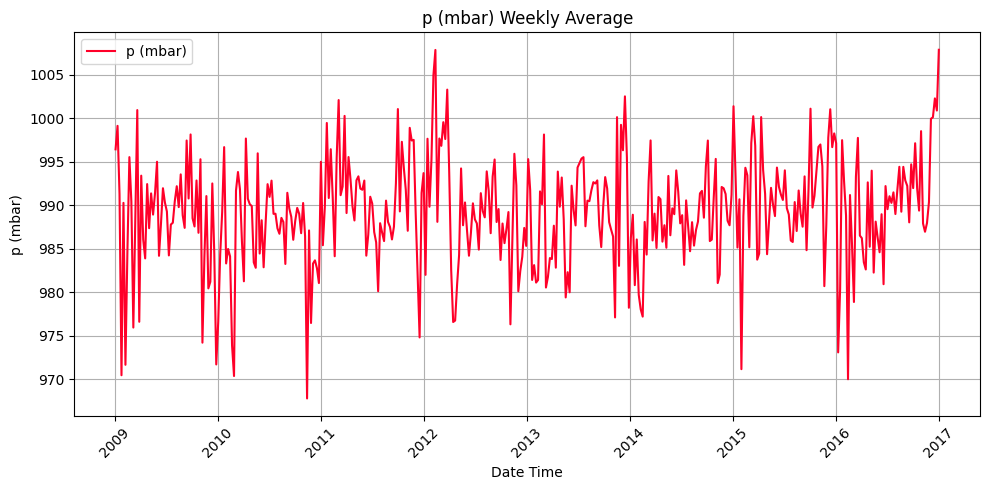

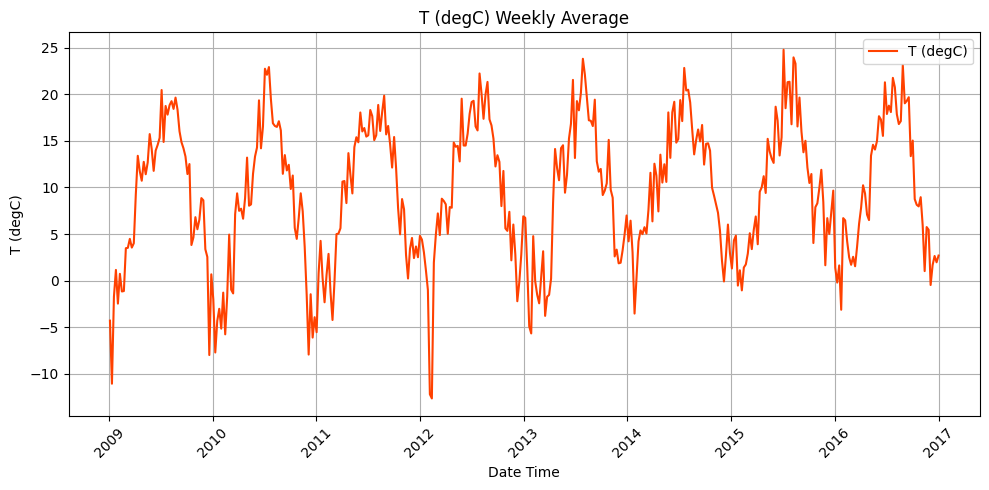

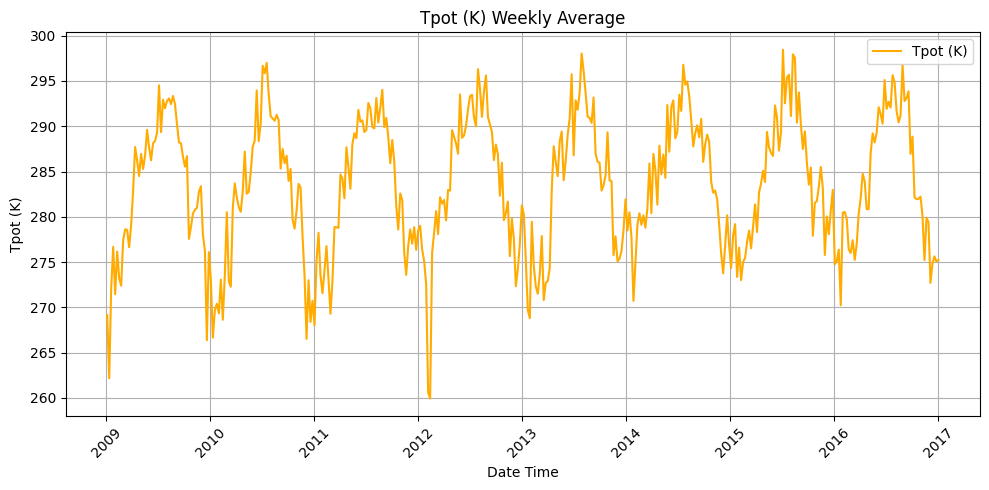

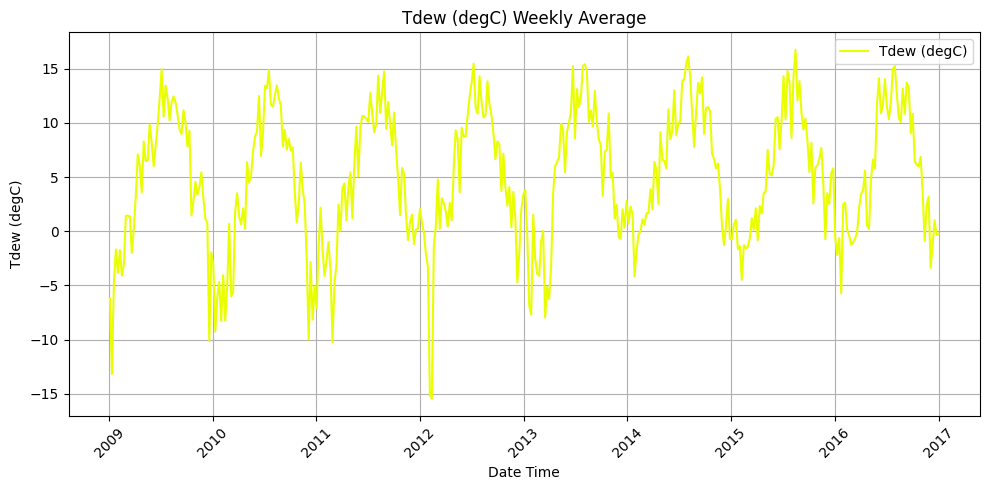

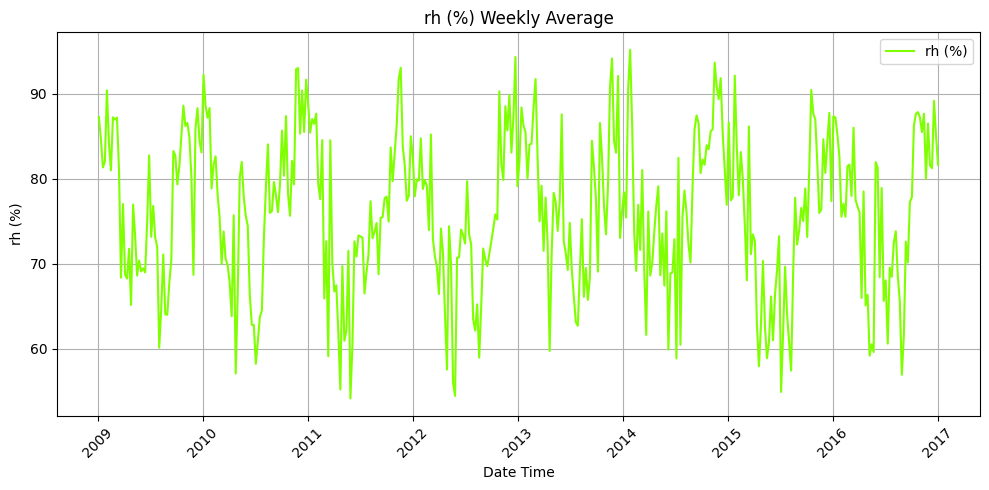

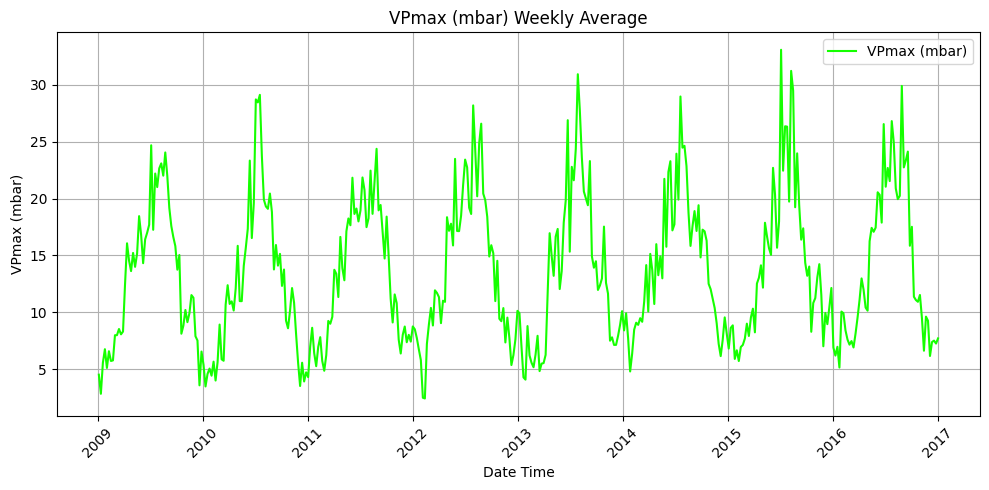

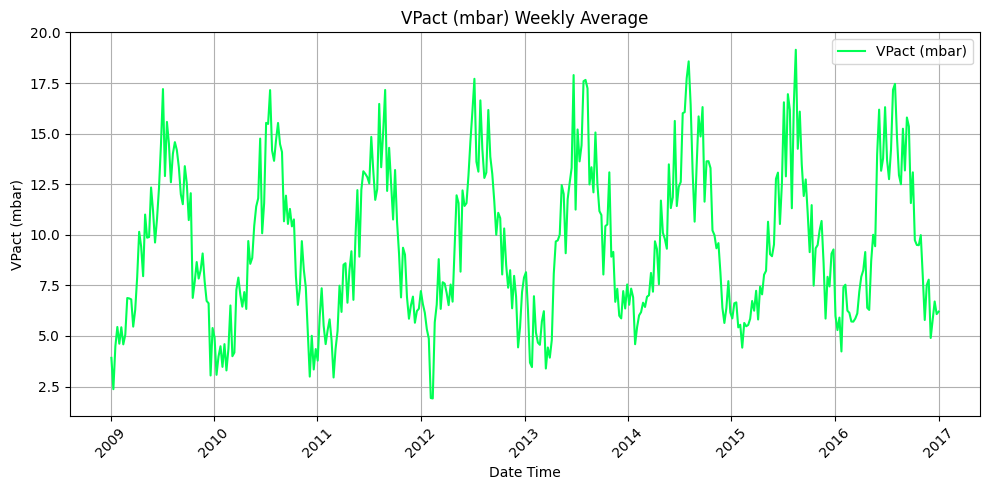

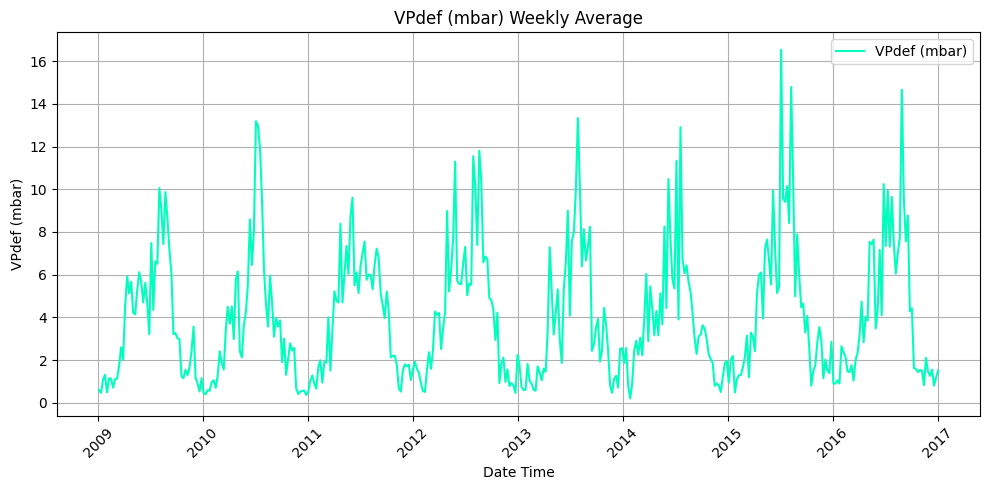

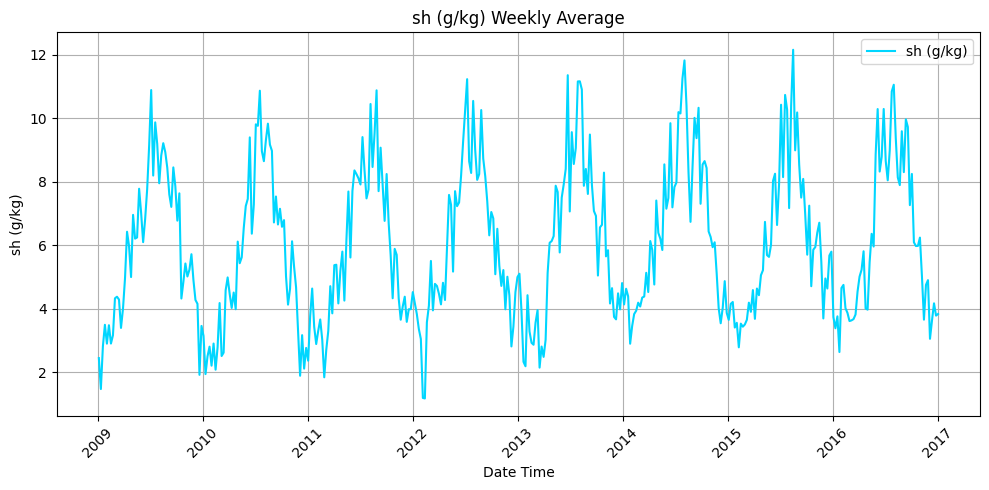

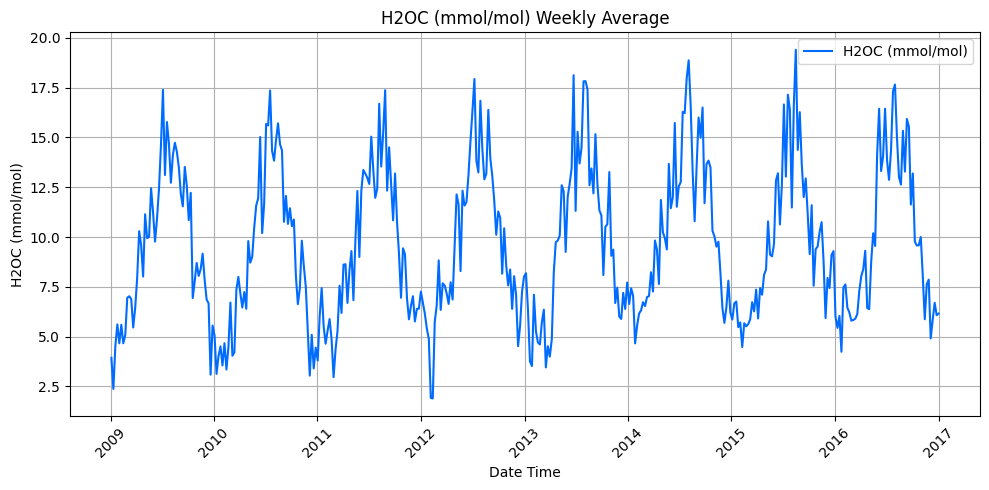

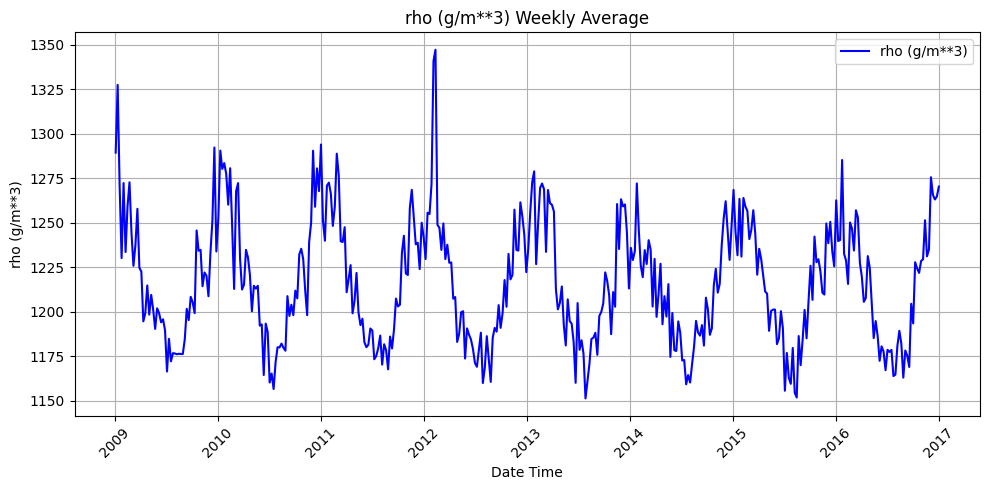

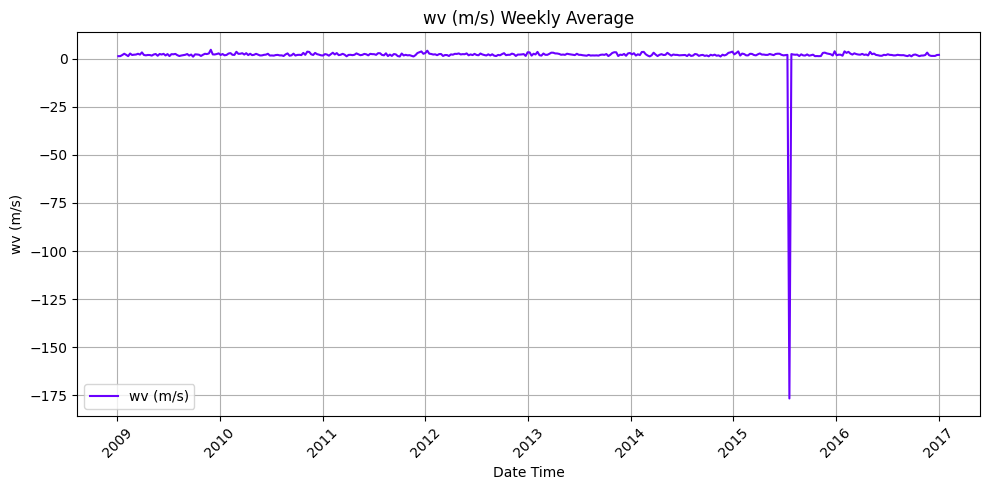

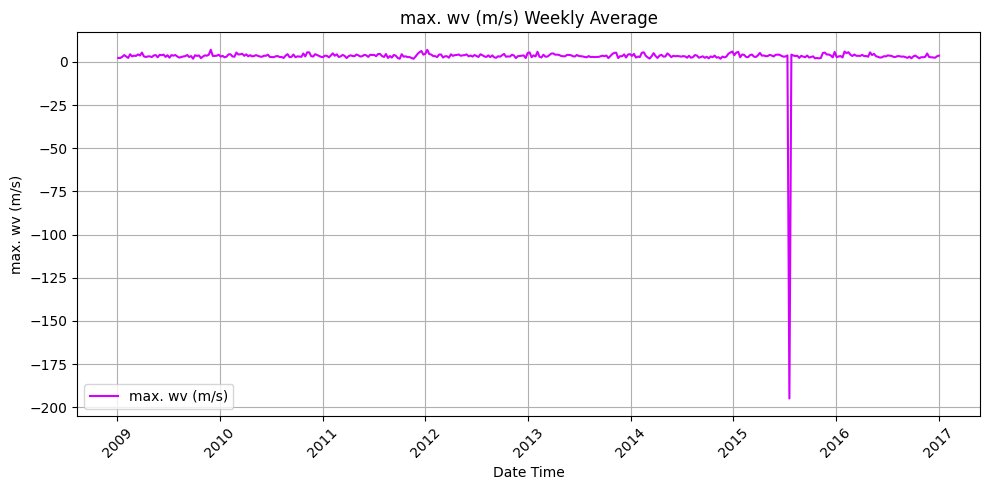

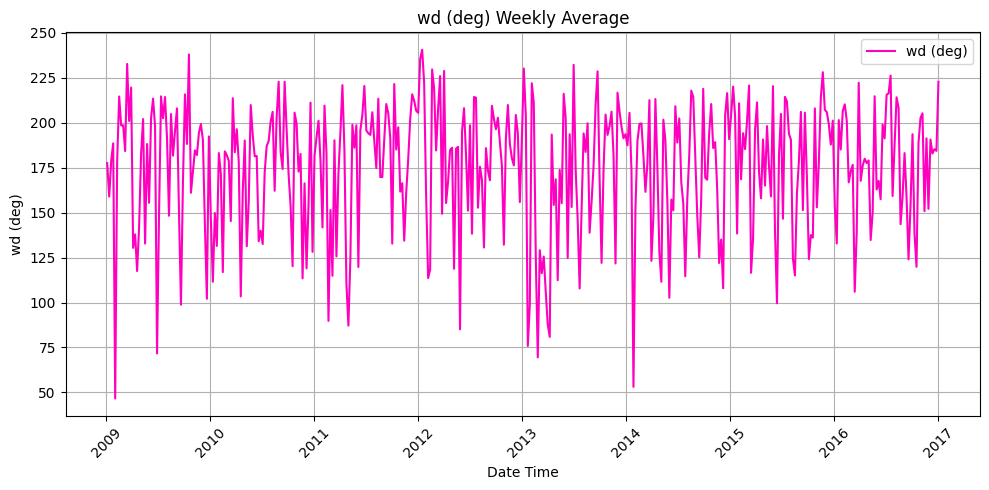

In [13]:
cmap = cm.get_cmap('gist_rainbow', len(columns))

for colore, column in enumerate(columns):
    plt.figure(figsize=(10, 5))
    plt.plot(weather_df_weekly.index, weather_df_weekly[column], label=column, color=cmap(colore))
    plt.title(f'{column} Weekly Average')
    plt.xlabel('Date Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

It's clear from the plots, that the column 'wv (m/s)' and 'max. wv (m/s)' both have an outlier in the year 2015.

In [14]:
print(weather_df_weekly.loc['2015', 'wv (m/s)'].min())
print(weather_df_weekly.loc['2015', 'max. wv (m/s)'].min())

-176.61443452380954
-194.96038690476192


The values are so significantly different from the rest of the data that we can assume they are a mistake.

### Correlation

In [15]:
correlation_matrix = weather_df_weekly.corr()
correlation_matrix

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  \
p (mbar)         1.000000  0.027832 -0.039525     0.011353 -0.053637   
T (degC)         0.027832  1.000000  0.997730     0.969344 -0.626309   
Tpot (K)        -0.039525  0.997730  1.000000     0.968185 -0.622519   
Tdew (degC)      0.011353  0.969344  0.968185     1.000000 -0.417848   
rh (%)          -0.053637 -0.626309 -0.622519    -0.417848  1.000000   
VPmax (mbar)     0.044319  0.970678  0.967341     0.925806 -0.642372   
VPact (mbar)     0.022568  0.950386  0.948549     0.976945 -0.416997   
VPdef (mbar)     0.065444  0.866563  0.861806     0.738885 -0.836910   
sh (g/kg)        0.010454  0.949749  0.948736     0.976503 -0.416256   
H2OC (mmol/mol)  0.010443  0.950039  0.949026     0.976813 -0.416378   
rho (g/m**3)     0.201229 -0.973137 -0.986291    -0.951531  0.587667   
wv (m/s)        -0.022969 -0.090724 -0.089152    -0.093907  0.029708   
max. wv (m/s)   -0.028693 -0.089489 -0.087527    -0.095045  0.019868   
wd (deg)        -0.074275  0.121678  0.126894     0.126692 -0.097112   

                 VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
p (mbar)             0.044319      0.022568      0.065444   0.010454   
T (degC)             0.970678      0.950386      0.866563   0.949749   
Tpot (K)             0.967341      0.948549      0.861806   0.948736   
Tdew (degC)          0.925806      0.976945      0.738885   0.976503   
rh (%)              -0.642372     -0.416997     -0.836910  -0.416256   
VPmax (mbar)         1.000000      0.952574      0.925707   0.952087   
VPact (mbar)         0.952574      1.000000      0.766704   0.999912   
VPdef (mbar)         0.925707      0.766704      1.000000   0.765784   
sh (g/kg)            0.952087      0.999912      0.765784   1.000000   
H2OC (mmol/mol)      0.952062      0.999914      0.765731   0.999999   
rho (g/m**3)        -0.934818     -0.926139     -0.821049  -0.928228   
wv (m/s)            -0.112540     -0.113308     -0.096596  -0.113210   
max. wv (m/s)       -0.112645     -0.115588     -0.093984  -0.115414   
wd (deg)             0.045504      0.068541      0.010812   0.069610   

                 H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
p (mbar)                0.010443      0.201229 -0.022969      -0.028693   
T (degC)                0.950039     -0.973137 -0.090724      -0.089489   
Tpot (K)                0.949026     -0.986291 -0.089152      -0.087527   
Tdew (degC)             0.976813     -0.951531 -0.093907      -0.095045   
rh (%)                 -0.416378      0.587667  0.029708       0.019868   
VPmax (mbar)            0.952062     -0.934818 -0.112540      -0.112645   
VPact (mbar)            0.999914     -0.926139 -0.113308      -0.115588   
VPdef (mbar)            0.765731     -0.821049 -0.096596      -0.093984   
sh (g/kg)               0.999999     -0.928228 -0.113210      -0.115414   
H2OC (mmol/mol)         1.000000     -0.928541 -0.113066      -0.115265   
rho (g/m**3)           -0.928541      1.000000  0.082186       0.079688   
wv (m/s)               -0.113066      0.082186  1.000000       0.999558   
max. wv (m/s)          -0.115265      0.079688  0.999558       1.000000   
wd (deg)                0.070004     -0.142262 -0.039374      -0.025644   

                 wd (deg)  
p (mbar)        -0.074275  
T (degC)         0.121678  
Tpot (K)         0.126894  
Tdew (degC)      0.126692  
rh (%)          -0.097112  
VPmax (mbar)     0.045504  
VPact (mbar)     0.068541  
VPdef (mbar)     0.010812  
sh (g/kg)        0.069610  
H2OC (mmol/mol)  0.070004  
rho (g/m**3)    -0.142262  
wv (m/s)        -0.039374  
max. wv (m/s)   -0.025644  
wd (deg)         1.000000

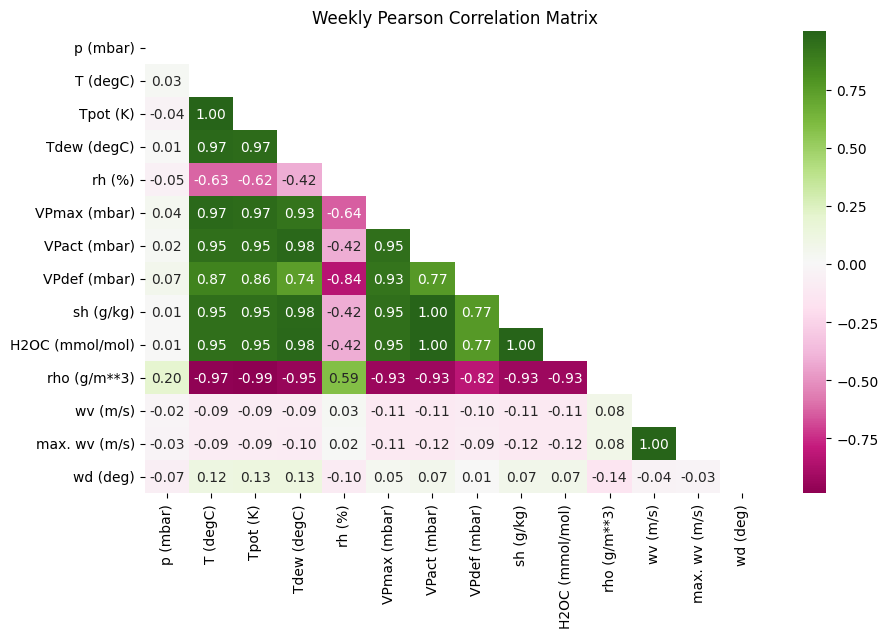

In [16]:
plt.figure(figsize=(10, 6))
pearson_corr = weather_df_weekly.corr(method='pearson') 
matrix = np.triu(pearson_corr)
sns.heatmap(pearson_corr, annot=True, cmap='PiYG', fmt=".2f", cbar=True,mask=matrix)
plt.title('Weekly Pearson Correlation Matrix')
plt.show()

As expected, the temperature columns are highly correlated, same for the columns for humidity and water vapor concentration. It makes sense that the columns for meteorological are correlated with each others, excluding the ones about the wind (though, there is of course an high correlation between wind speed and maximum wind speed.)

### Scatter plots

???

### Heatmaps

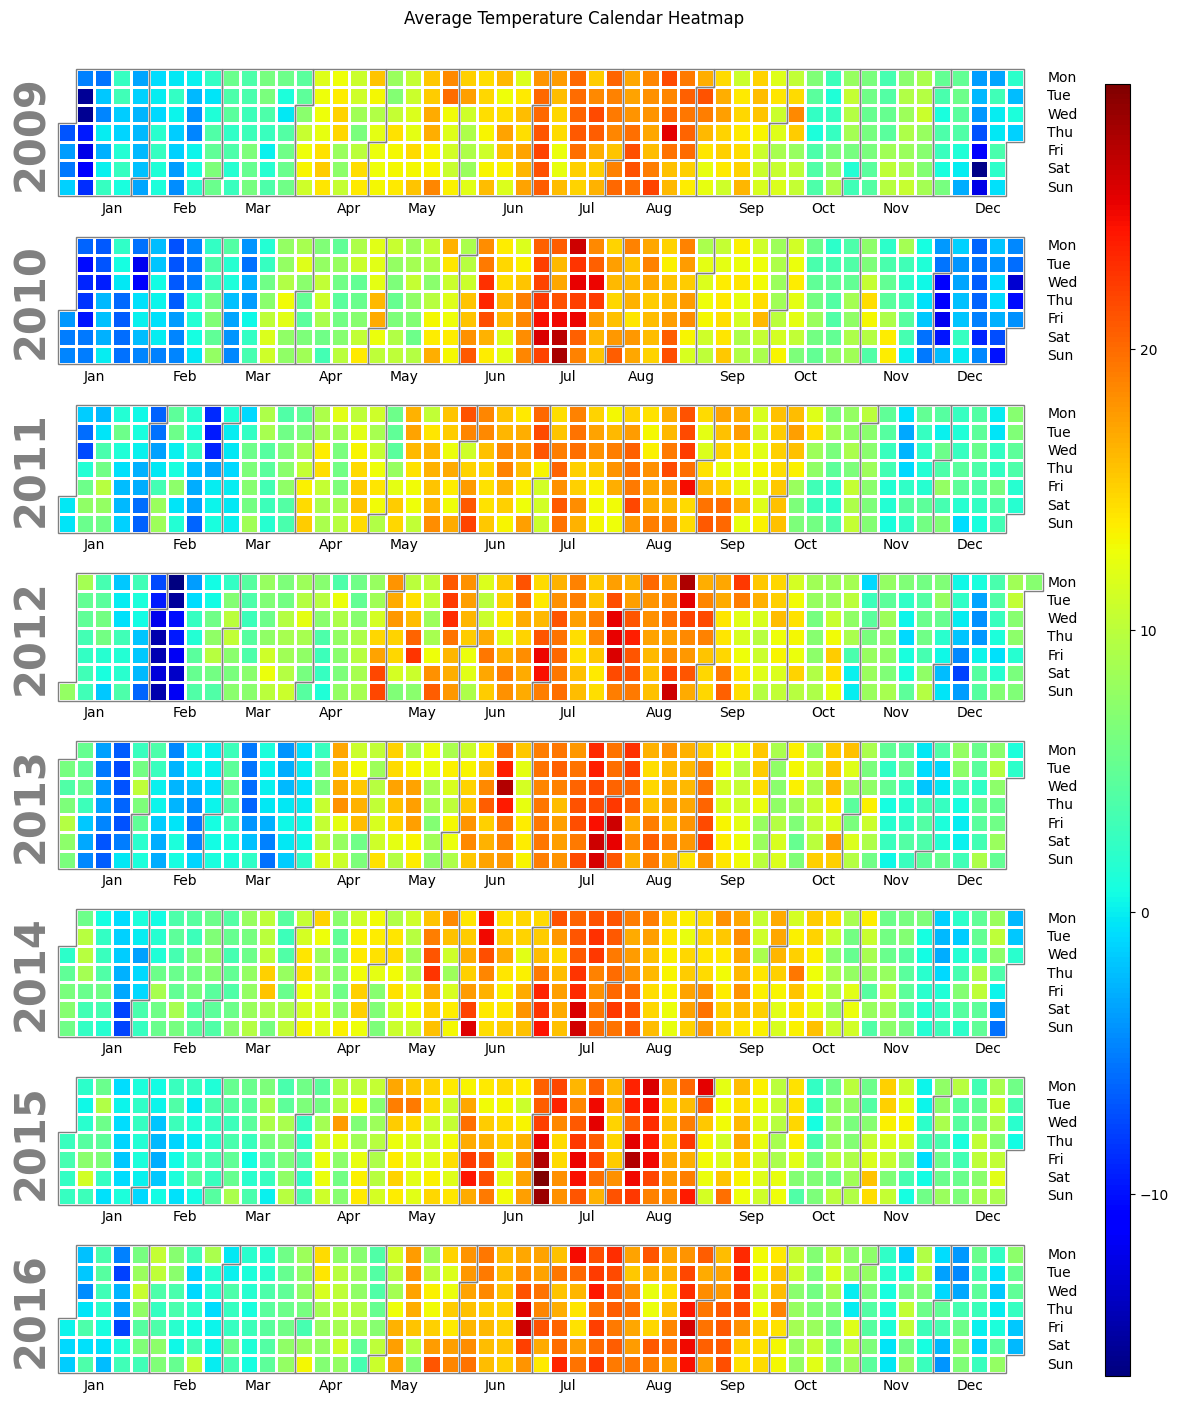

In [17]:
weather_df_daily = weather_df.resample('D').mean()

calplot.calplot(
    weather_df_daily['T (degC)'], 
    cmap='jet', 
    colorbar=True, 
    suptitle="Average Temperature Calendar Heatmap",
    yearlabel_kws={'fontname':'sans-serif'})
plt.show()

I wanted to use a july.heatmap(), but I had some deprecation issues with Matplotlib.

### Box plots

In [18]:
# Add one colum to indicate the year (DatetimeIndex -> PeriodIndex)
weather_df_weekly_period = weather_df_weekly.copy()
weather_df_weekly_period['Period_Y'] = weather_df_weekly_period.index.to_period('Y')
weather_df_weekly_period.head(5)

p (mbar)   T (degC)    Tpot (K)  Tdew (degC)     rh (%)  \
Date Time                                                               
2009-01-04  996.446696  -4.292070  269.146087    -6.185148  87.255409   
2009-01-11  999.146161 -11.057847  262.168393   -13.171438  84.714841   
2009-01-18  991.308760  -1.717867  272.126657    -4.664692  81.310595   
2009-01-25  970.486319   1.151438  276.681220    -1.678264  82.035218   
2009-02-01  990.295337  -2.464573  271.454127    -3.848323  90.406944   

            VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                         
2009-01-04      4.511496      3.918348      0.593009   2.451287   
2009-01-11      2.831081      2.369058      0.462044   1.477421   
2009-01-18      5.561796      4.483313      1.078720   2.820536   
2009-01-25      6.752004      5.444335      1.307619   3.499306   
2009-02-01      5.104276      4.617619      0.486429   2.905952   

            H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                            
2009-01-04         3.934887   1289.293165  1.293252       2.310504   
2009-01-11         2.372718   1327.335734  1.312153       2.256984   
2009-01-18         4.526012   1270.352133  1.879524       2.970417   
2009-01-25         5.613720   1230.040417  2.553998       3.973105   
2009-02-01         4.663750   1272.179296  1.981885       3.170645   

              wd (deg) Period_Y  
Date Time                        
2009-01-04  177.589652     2009  
2009-01-11  158.967391     2009  
2009-01-18  178.882599     2009  
2009-01-25  188.601022     2009  
2009-02-01   46.615129     2009

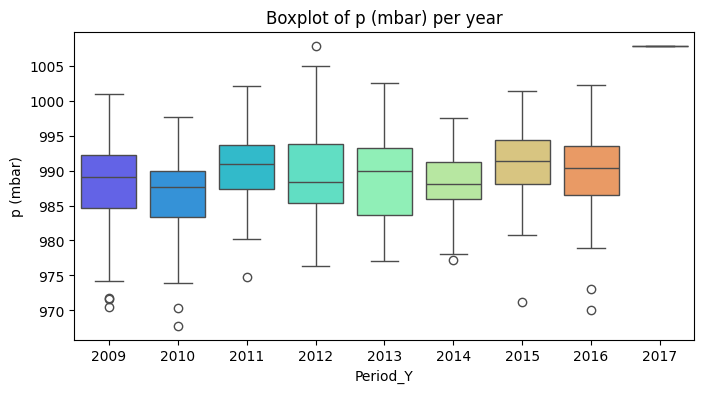

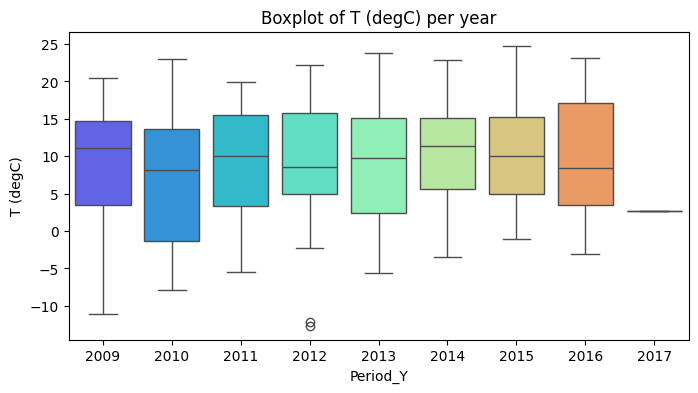

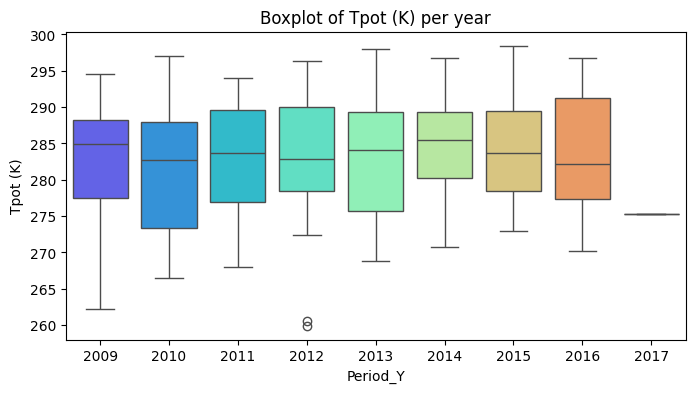

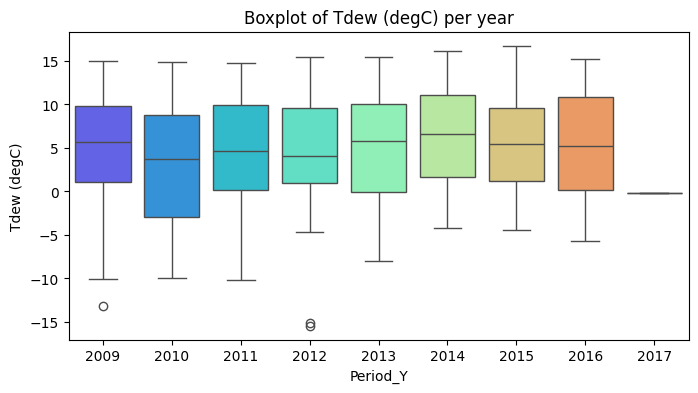

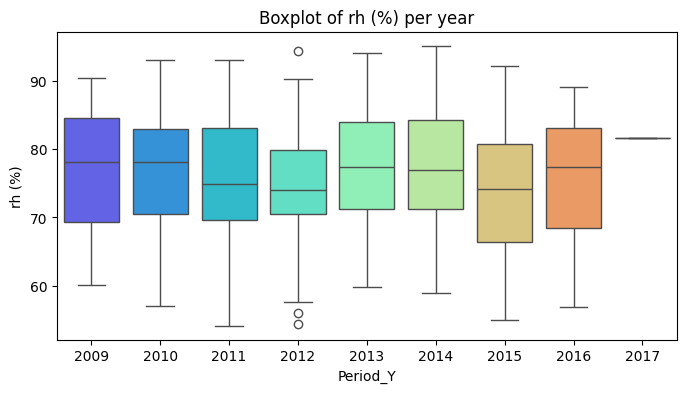

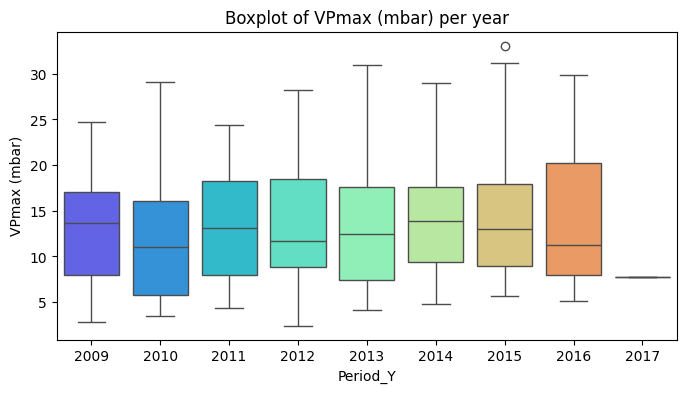

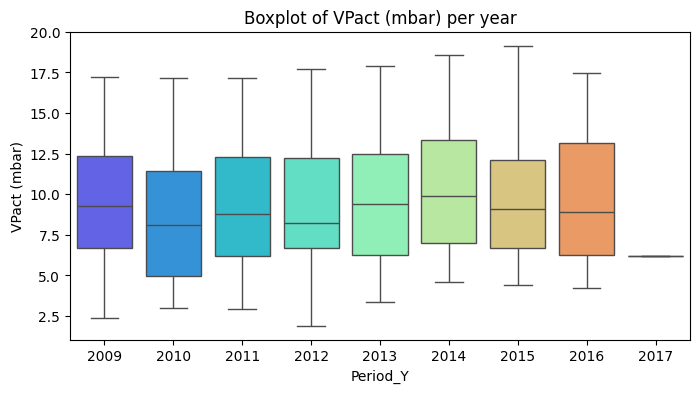

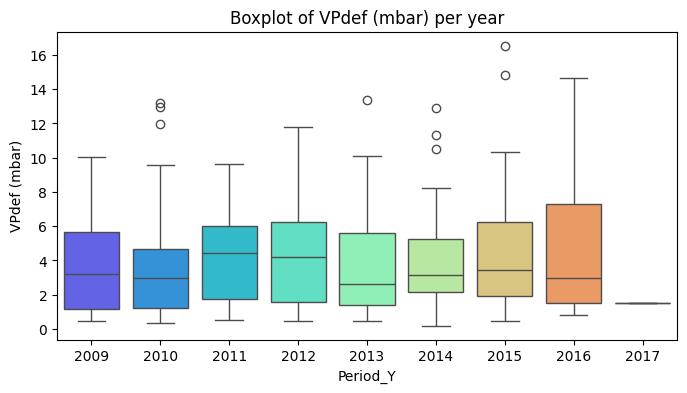

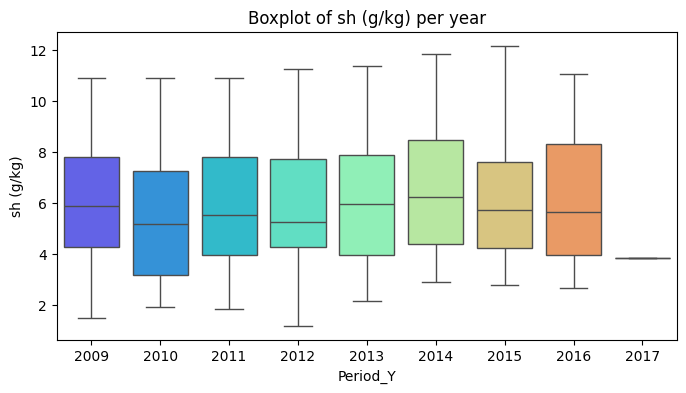

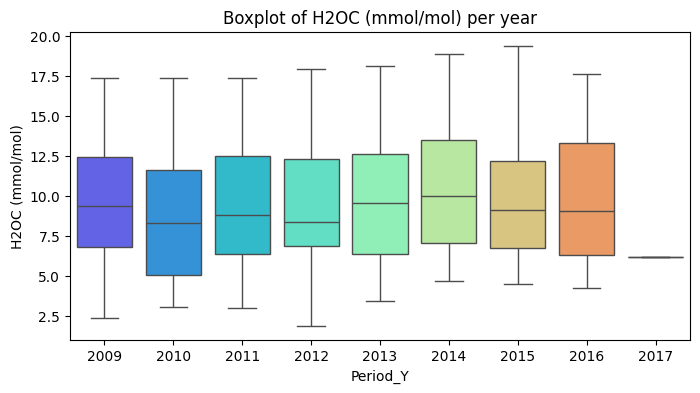

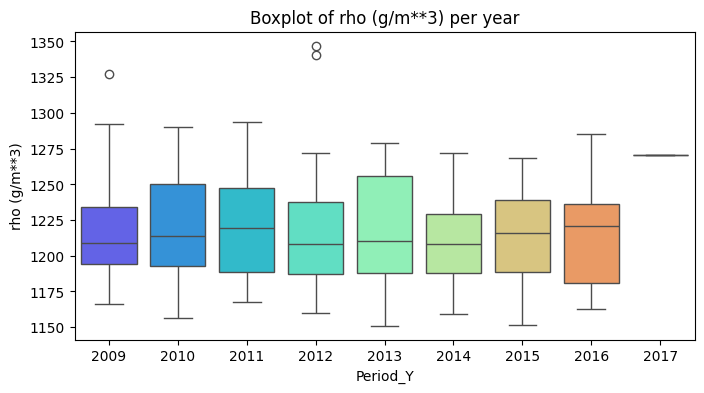

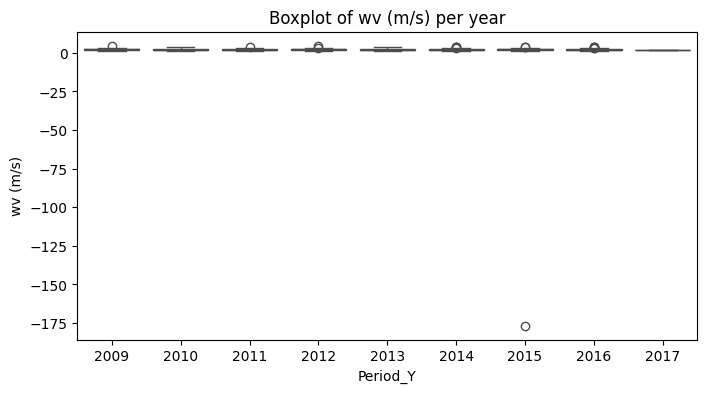

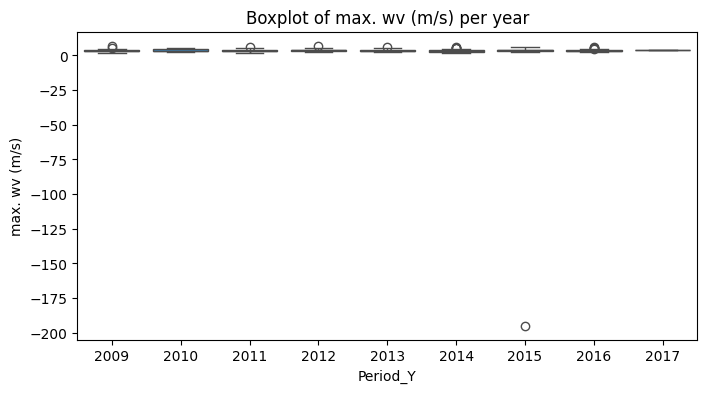

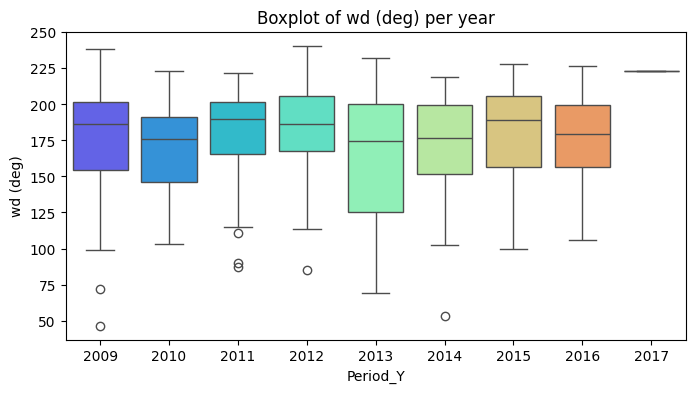

In [19]:
for column in weather_df_weekly_period.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8,4))
    plt.title('Boxplot of ' + column + ' per year')
    sns.boxplot(x = weather_df_weekly_period['Period_Y'], y = weather_df_weekly_period[column], palette='rainbow')
    plt.show()

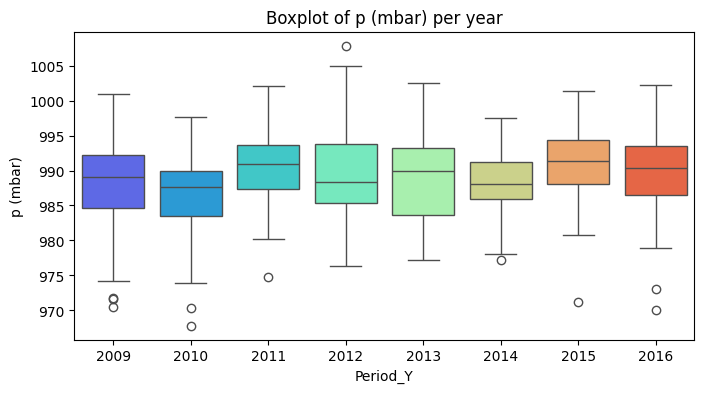

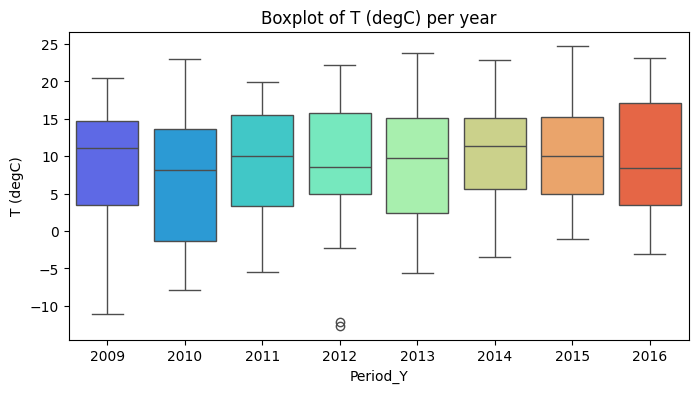

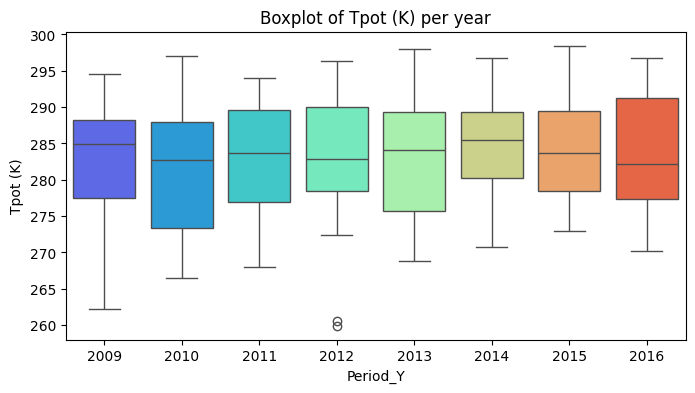

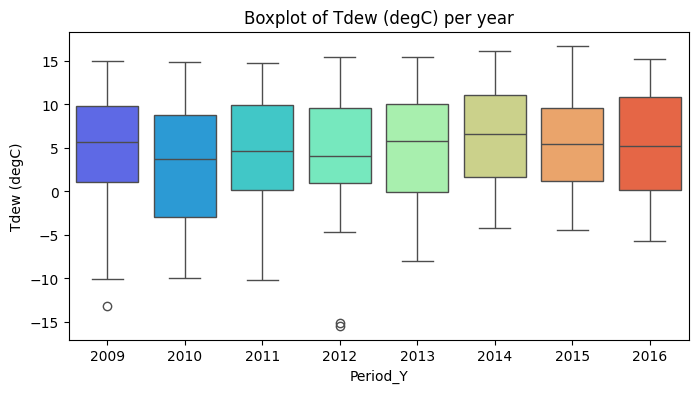

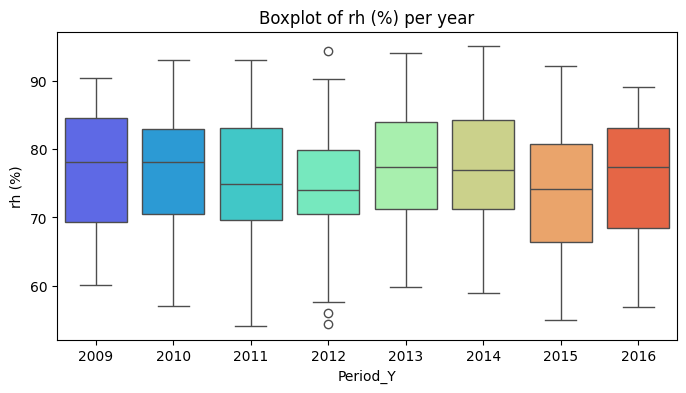

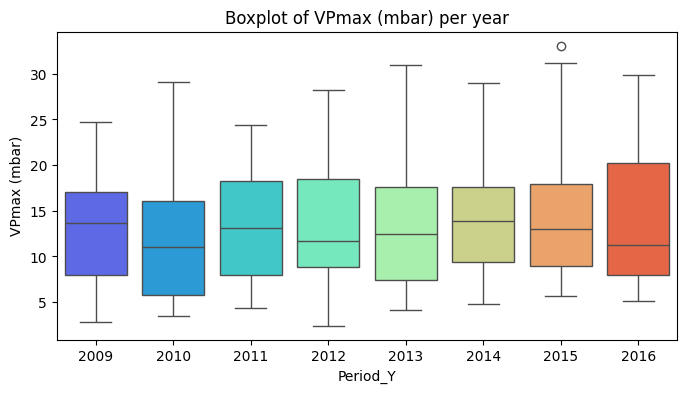

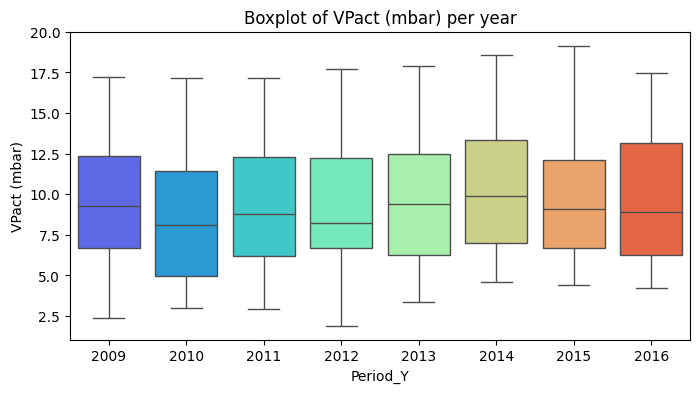

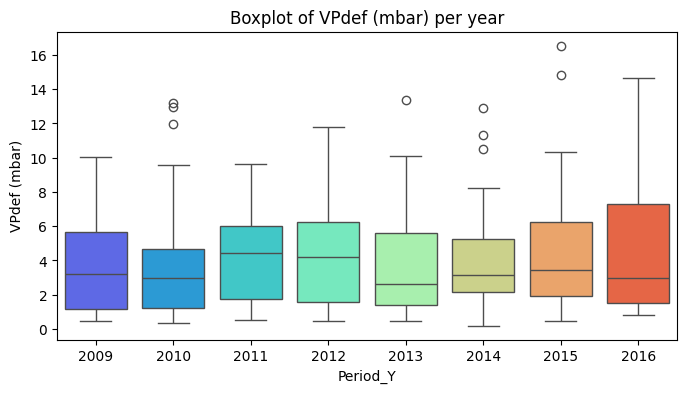

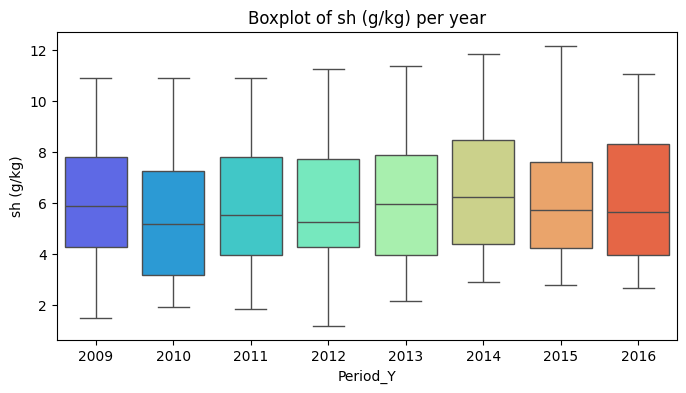

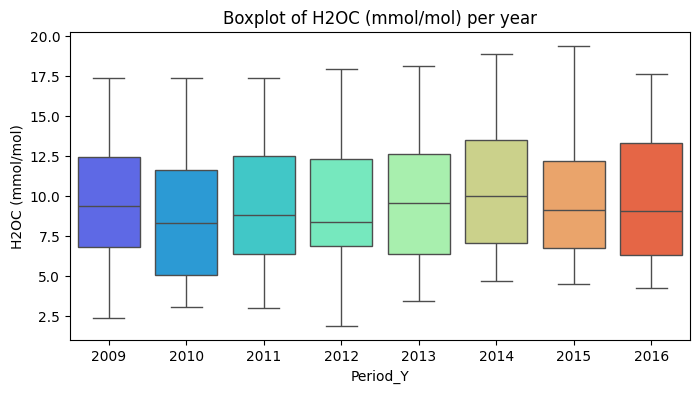

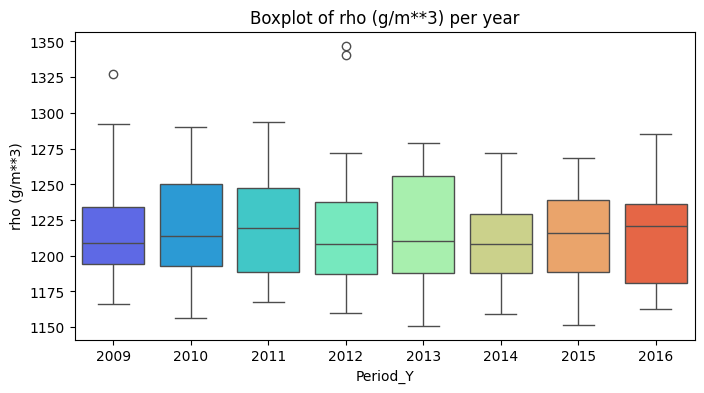

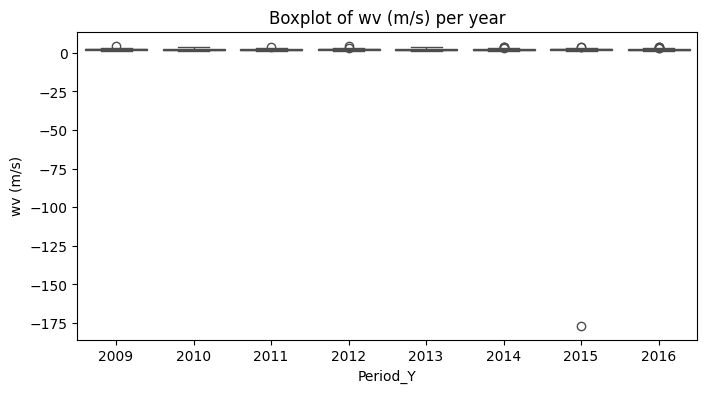

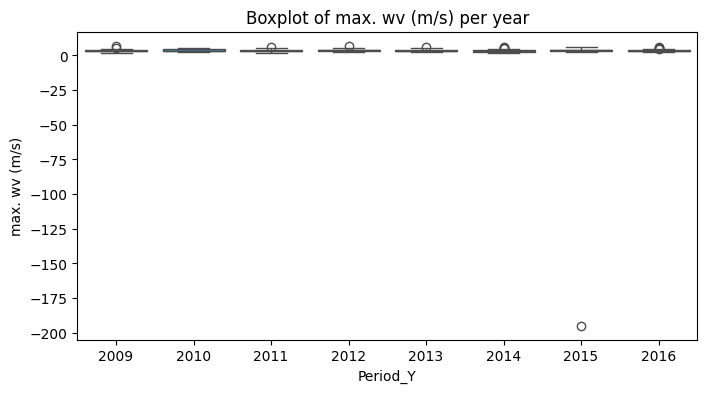

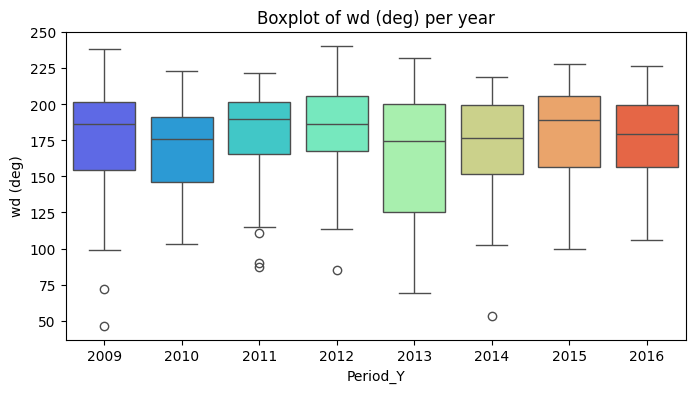

In [20]:
weather_df_weekly_period = weather_df_weekly_period[weather_df_weekly_period['Period_Y'] != '2017']

for column in weather_df_weekly_period.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8,4))
    plt.title('Boxplot of ' + column + ' per year')
    sns.boxplot(x = weather_df_weekly_period['Period_Y'], y = weather_df_weekly_period[column], palette='rainbow')
    plt.show()

The Box plots shows that several columns have some outliers, but the most significative ones are in 'wv (m/s)' and 'max. wv (m/s)' (as seen in the Line plots).

Box plot by month for the year 2013.

In [21]:
# Boxplot representing the monthly data for a specific year (2013)
weather_df_2013 = weather_df_weekly_period.loc[weather_df_weekly_period['Period_Y'] == '2013']
weather_df_2013['Period_MY'] = weather_df_2013.index.to_period('M')

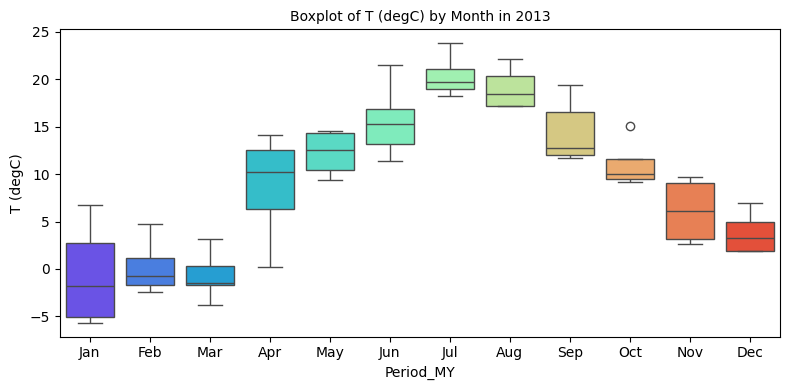

In [22]:
# For ease of visualization, we can then use dt.strftime() to convert to Index using specified date_format. It returns an Index of formatted strings.
plt.figure(figsize=(8,4))
sns.boxplot(x=weather_df_2013['Period_MY'].dt.strftime('%b'),y = weather_df_2013['T (degC)'], palette='rainbow')
plt.title('Boxplot of T (degC) by Month in 2013', fontsize=10)
plt.tight_layout()
plt.show()

### Violin plots

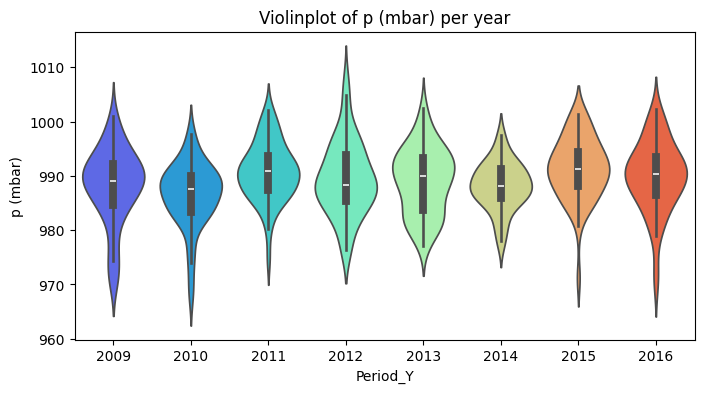

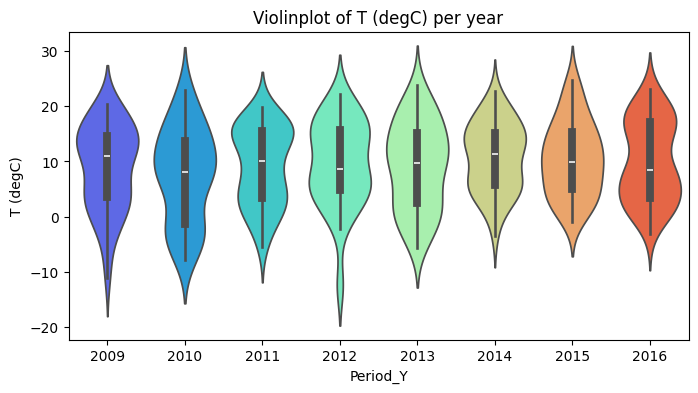

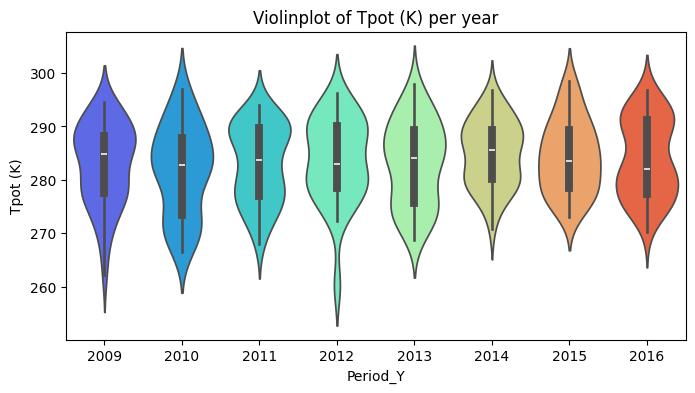

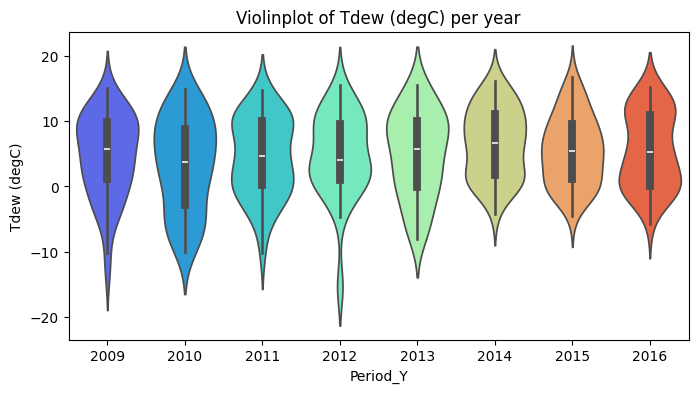

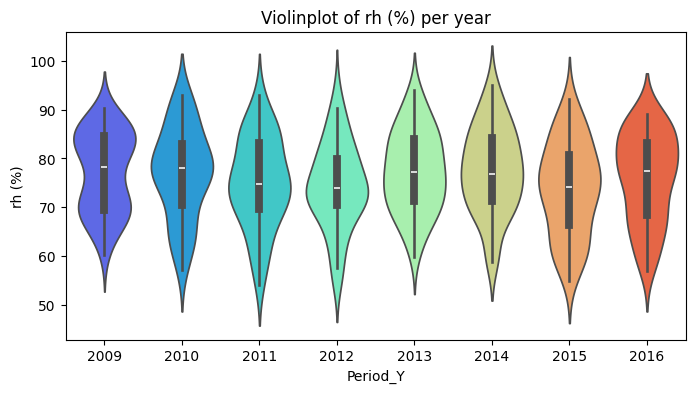

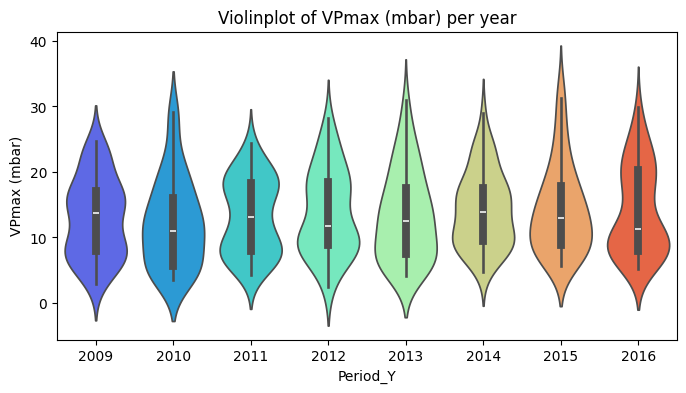

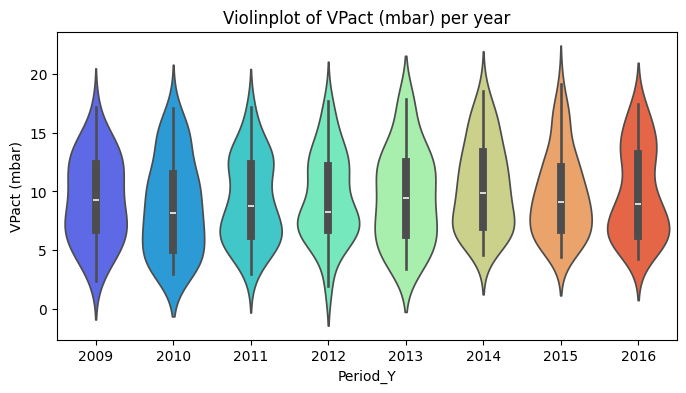

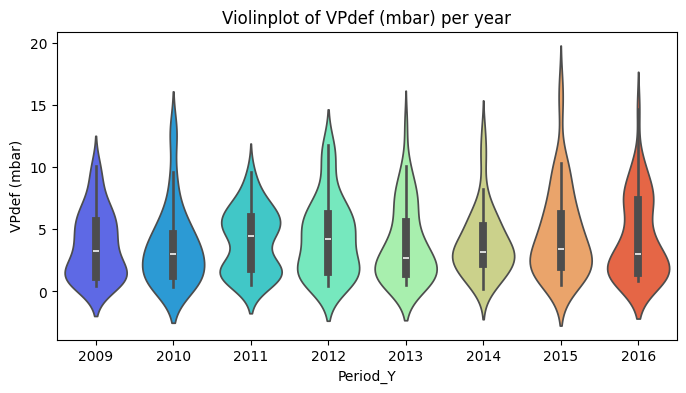

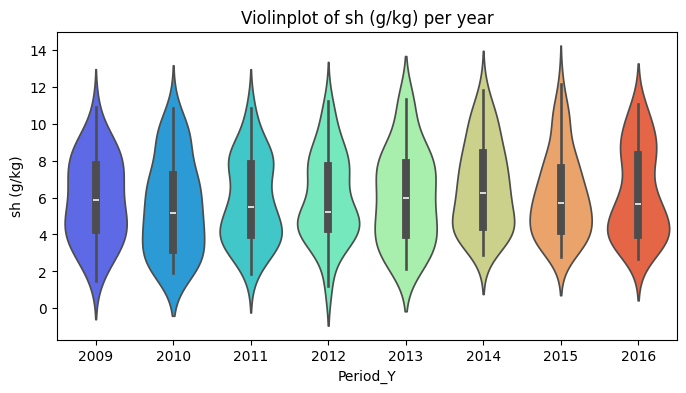

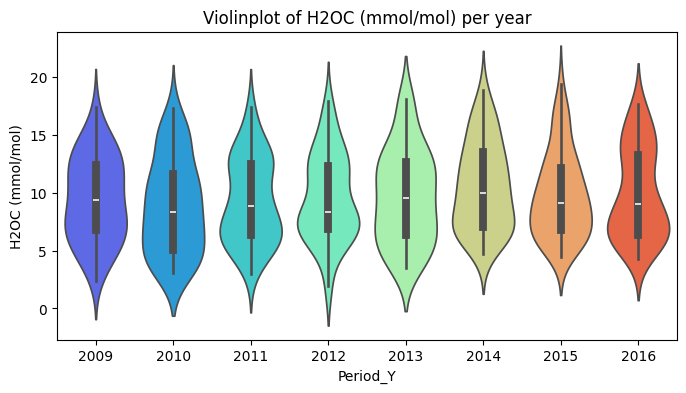

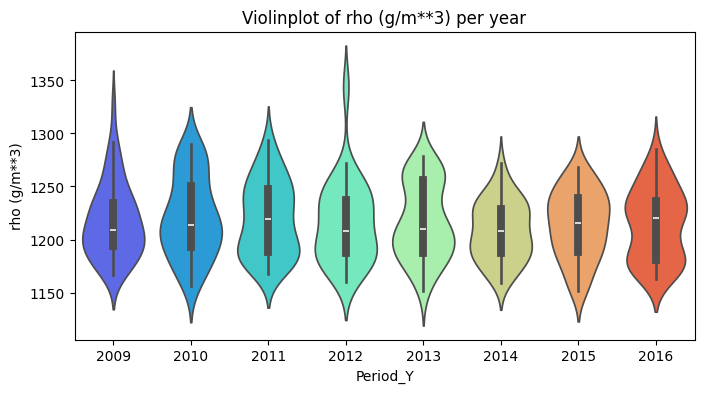

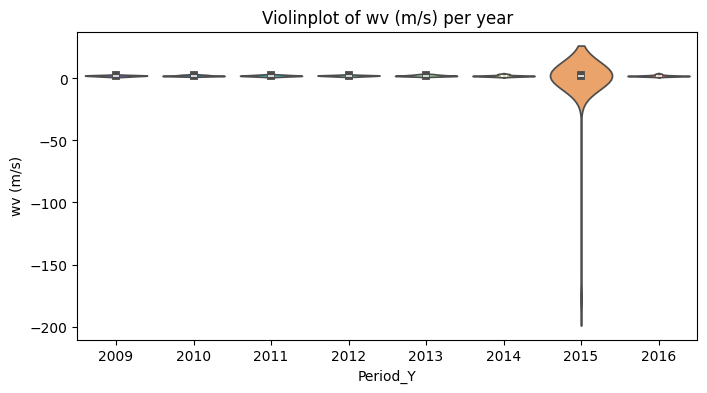

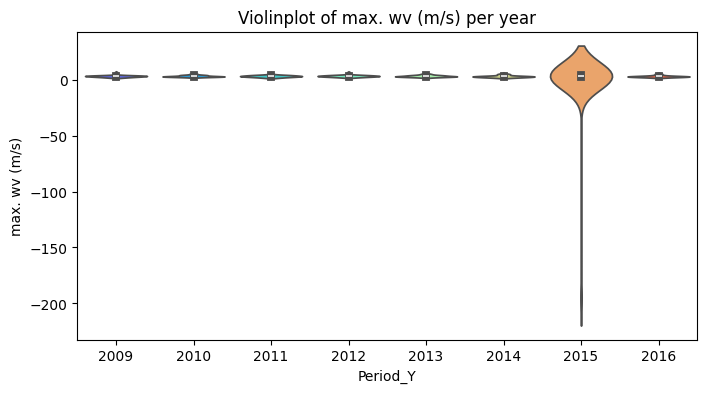

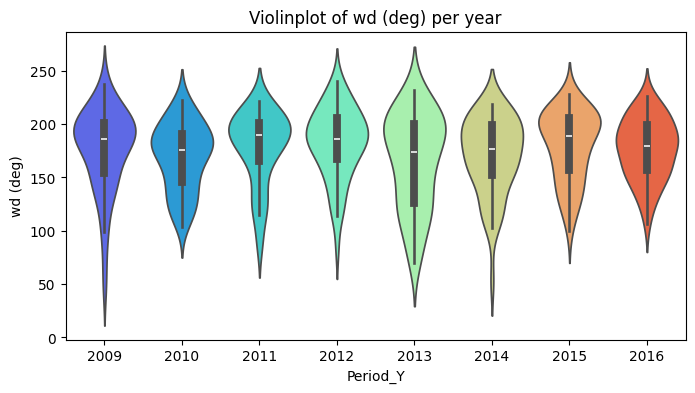

In [23]:
for column in weather_df_weekly_period.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8,4))
    plt.title('Violinplot of ' + column + ' per year')
    sns.violinplot(x = weather_df_weekly_period['Period_Y'], y = weather_df_weekly_period[column], palette='rainbow')
    plt.show()

Violin plot by month for the year 2013.

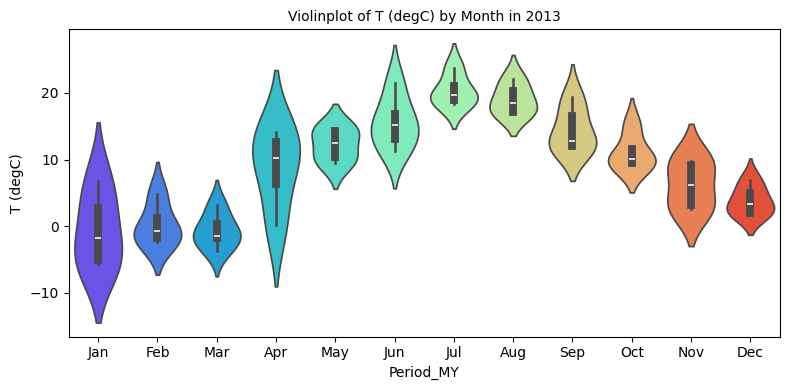

In [24]:
# For ease of visualization, we can then use dt.strftime() to convert to Index using specified date_format. It returns an Index of formatted strings.
plt.figure(figsize=(8,4))
sns.violinplot(x=weather_df_2013['Period_MY'].dt.strftime('%b'),y = weather_df_2013['T (degC)'], palette='rainbow')
plt.title('Violinplot of T (degC) by Month in 2013', fontsize=10)
plt.tight_layout()
plt.show()

### Outliers

**IQR**

1. Calculate the 3rd quartile and the 1st quartile.
2. Compute the IQR as the difference between 3rd quartile and the 1st quartile. 
3. Find the upper and lower limits.

In [25]:
for column in weather_df_weekly.columns:
    Q1_py = np.quantile(weather_df_weekly[column],0.25)
    Q3_py = np.quantile(weather_df_weekly[column],0.75)
    IQR = Q3_py-Q1_py
    Lower = Q1_py - 1.5*IQR
    Upper = Q3_py + 1.5*IQR

    T = []
    for i in weather_df_weekly[column]:
        exp1 = i < Lower
        exp2 = i > Upper
        if exp1 or exp2:
            temp = int(i)
            T.append(temp)
    print('Column ', column, 'has the outliers', T)

Column  p (mbar) has the outliers [970, 971, 974, 971, 973, 970, 967, 974, 1004, 1007, 971, 973, 970, 1007]
Column  T (degC) has the outliers []
Column  Tpot (K) has the outliers [260, 259]
Column  Tdew (degC) has the outliers [-15, -15]
Column  rh (%) has the outliers []
Column  VPmax (mbar) has the outliers [33]
Column  VPact (mbar) has the outliers []
Column  VPdef (mbar) has the outliers [13, 12, 13, 12, 16, 14, 14]
Column  sh (g/kg) has the outliers []
Column  H2OC (mmol/mol) has the outliers []
Column  rho (g/m**3) has the outliers [1327, 1340, 1347]
Column  wv (m/s) has the outliers [4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, -176, 3, 3, 3, 3]
Column  max. wv (m/s) has the outliers [7, 6, 7, 5, 6, 5, -194, 5, 5]
Column  wd (deg) has the outliers [46, 71, 75, 69, 53]


**Standard deviation**
1. Calculate the average and standard deviation of the data set.
2. Determine if any results are greater than +/- 3 times the standard deviation. 
3. Find the upper and lower limits.

In [26]:
for column in weather_df_weekly.columns:
    mean_value = np.mean(weather_df_weekly[column])
    sd_value = np.std(weather_df_weekly[column])
    thr = 3*sd_value
    Lower = mean_value - thr
    Upper = mean_value + thr

    outliers = [i for i in weather_df_weekly[column] if i < Lower or i > Upper]
    print('Column ', column, 'has', len(outliers), 'outliers')

    #no_outliers = [i for i in weather_df_weekly[column] if i > Lower and i < Upper]
    #print('Number of non-outliers:', len(no_outliers))

Column  p (mbar) has 5 outliers
Column  T (degC) has 0 outliers
Column  Tpot (K) has 2 outliers
Column  Tdew (degC) has 2 outliers
Column  rh (%) has 0 outliers
Column  VPmax (mbar) has 1 outliers
Column  VPact (mbar) has 0 outliers
Column  VPdef (mbar) has 5 outliers
Column  sh (g/kg) has 0 outliers
Column  H2OC (mmol/mol) has 0 outliers
Column  rho (g/m**3) has 3 outliers
Column  wv (m/s) has 1 outliers
Column  max. wv (m/s) has 1 outliers
Column  wd (deg) has 2 outliers


### Histograms

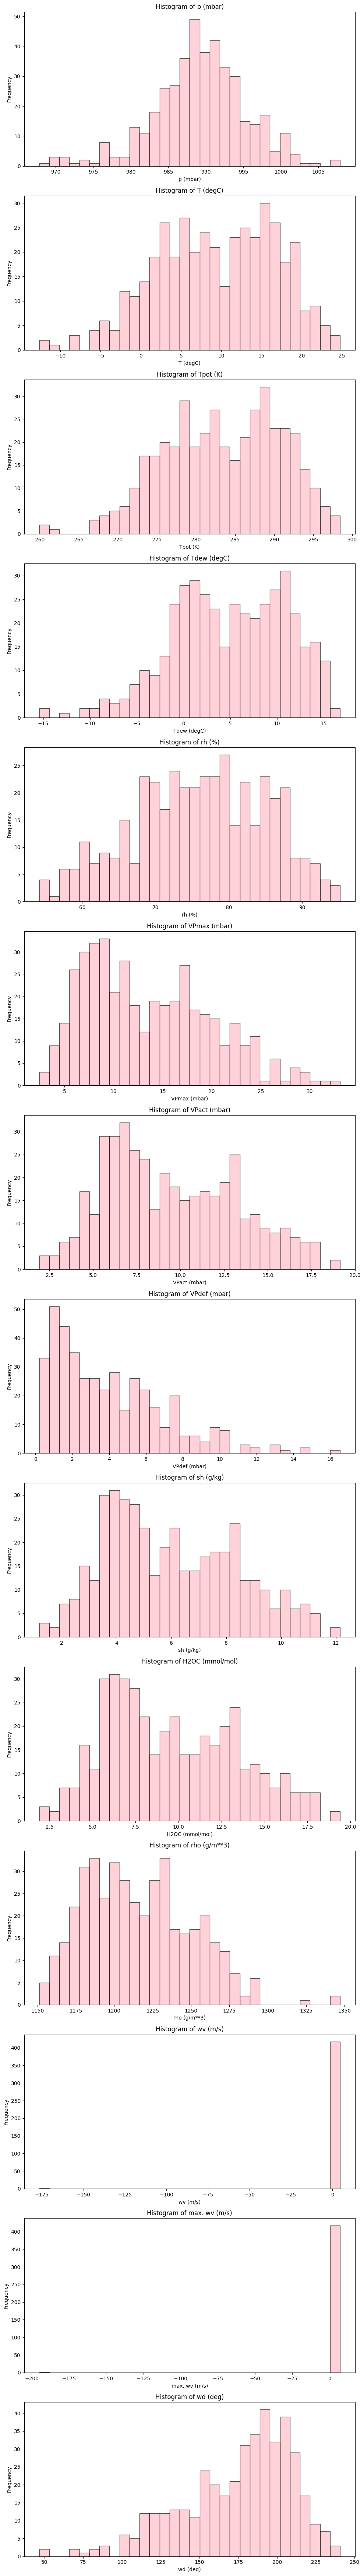

In [46]:
fig, axes = plt.subplots(len(weather_df_weekly.columns), 1, figsize=(10, len(weather_df_weekly.columns) * 5))
for i, column in enumerate(weather_df_weekly.columns):
    ax = axes[i] if len(weather_df_weekly.columns) > 1 else axes
    ax.hist(weather_df_weekly[column].dropna(), bins=30, color='pink', edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Lag plots

In [27]:
from pandas.plotting import lag_plot

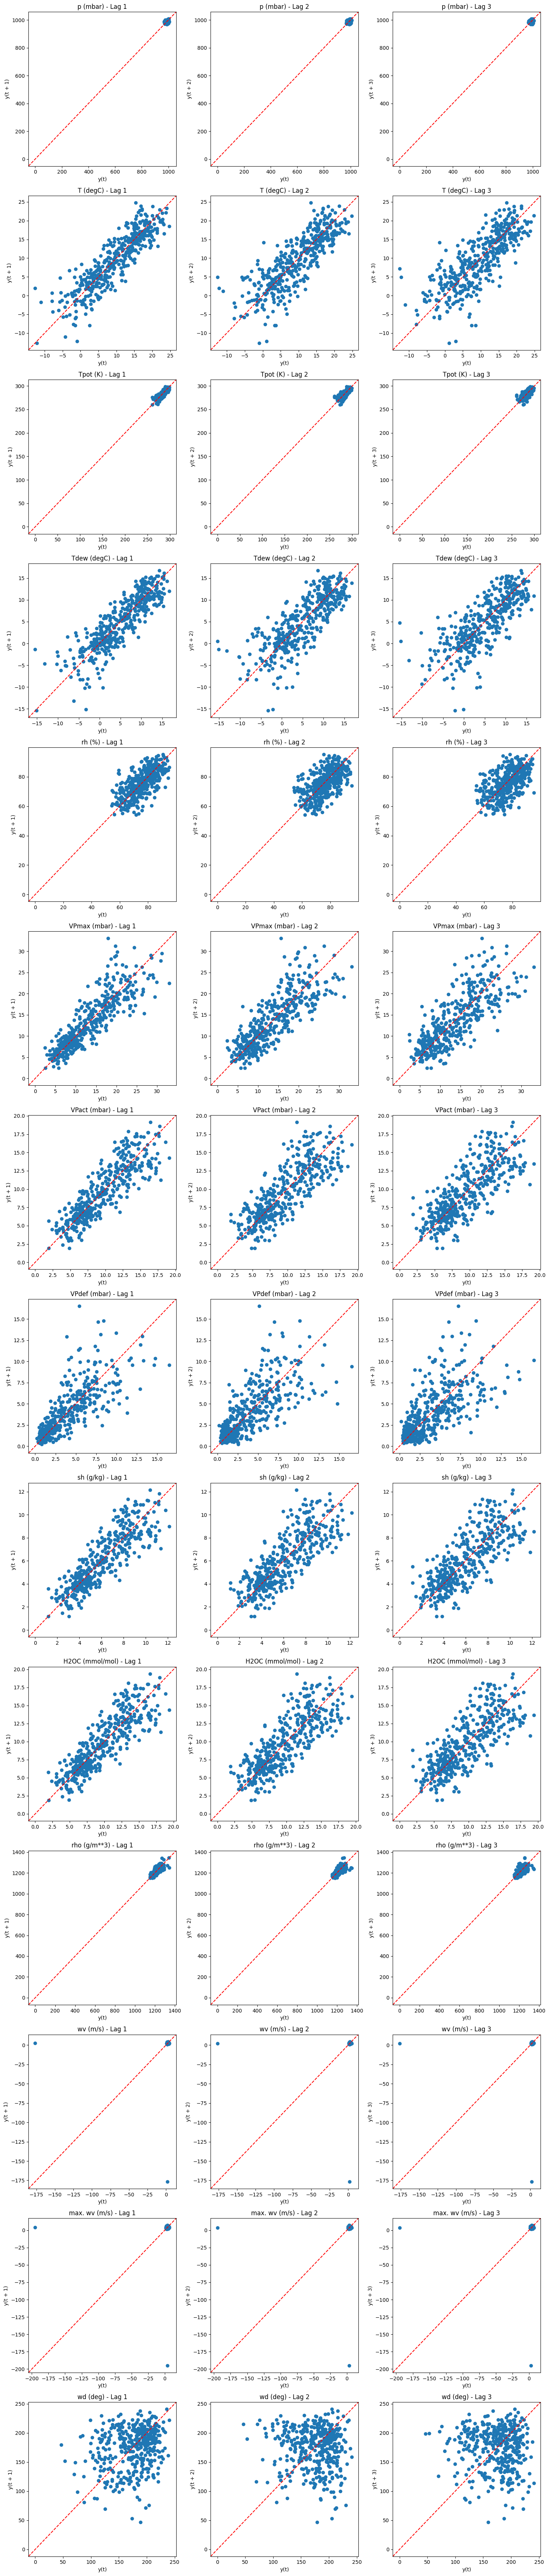

In [37]:
lags = [1, 2, 3]

fig, axes = plt.subplots(14, len(lags), figsize=(15, 14 * 5))
for i, column in enumerate(weather_df_weekly.columns):
    for j, lag in enumerate(lags):
        ax = axes[i, j]
        lag_plot(weather_df_weekly[column], lag=lag, ax=ax)
        
        pt = (0, 0)
        ax.axline(pt, slope=1, color='red', linestyle='--')
        
        ax.set_title(f'{column} - Lag {lag}')
plt.tight_layout()
plt.show()

### Frequency analysis

## **Point 3**
Describing the time series patterns (visually and numerically);

## **Point 4**
Focusing on temperature (degC, dependent variable), build the most appropriate models to forecast the
data for the specified period. Evaluate the model performance using different metrics. Visualise the results with appropriate graphs.

I'm focusing on the column T (degC), which, we have seen in the Correlation plot, has an high correlation with the columns:
- (Tpot (K)),
- (Tdew (degC)),
- VPmax (mbar),
- VPact (mbar),
- VPdef (mbar),
- sh (g/kg),
- H2OC (mmol/mol),
- rho (g/m**3) - negative correlation.